# Text classification using RNNs

In [4]:
import tensorflow_datasets # pip install tensorflow_datasets
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Load dataset with reviews from IMDB

These reviews are classified as either negative (label 0) or positive (label 1).

In [5]:
dataset, info = tensorflow_datasets.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

## Dataset split

Get subset of the data for training and testing (5000 samples each). Convert Keras dataset to lists of strings and labels.

In [6]:
x_train = []
y_train = []

for sample, label in train_dataset.take(5000):
    x_train.append(sample.numpy())
    y_train.append(label.numpy())

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

print(x_train[0])
print(y_train[0])

x_test = []
y_test = []

for sample, label in test_dataset.take(5000):
    x_test.append(sample.numpy())
    y_test.append(label.numpy())

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print(x_test[0])
print(y_test[0])

b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
0
b"There are films that make careers. For George Romero, it was NIGHT OF THE LIVING DEAD; for Kevin Smith, CLERKS; for Robert Rodriguez, EL MARIACHI. Add to that list Onur Tukel's absolutely amazing DING-A-LING-LESS. Flawless film-making, and as assured and as professional as any of th

## Learn the vocabulary from the training data

In [7]:
max_words = 1000
vectorize_layer = tf.keras.layers.TextVectorization(max_tokens=max_words)

vectorize_layer.adapt(x_train)

vocab = np.array(vectorize_layer.get_vocabulary())
vocab[:100]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'with', 'for', 'but', 'movie',
       'film', 'on', 'not', 'his', 'you', 'are', 'have', 'be', 'he',
       'one', 'its', 'at', 'all', 'by', 'they', 'an', 'from', 'who', 'so',
       'like', 'her', 'or', 'just', 'if', 'about', 'out', 'has', 'what',
       'some', 'there', 'good', 'more', 'very', 'when', 'my', 'she', 'no',
       'even', 'would', 'up', 'time', 'which', 'really', 'only', 'had',
       'were', 'see', 'their', 'can', 'story', 'me', 'than', 'get',
       'much', 'we', 'into', 'been', 'first', 'also', 'will', 'other',
       'bad', 'do', 'people', 'great', 'well', 'because', 'most', 'how',
       'dont', 'him', 'then', 'made', 'films', 'too', 'way', 'them',
       'any', 'make', 'movies'], dtype='<U14')

In [8]:
print(x_train[:2])
vectorized = vectorize_layer(x_train[:2]).numpy()
print(vectorized)

[b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
 b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development w

## Training an RNN using Keras

In [11]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=max_words, output_dim=64, mask_zero=True),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 76,481
Trainable params: 76,481
Non-trainable params: 0
__________________________________________________

Epoch 1/10
79/79 [==============================] - 30s 348ms/step - loss: 0.6949 - accuracy: 0.5030 - val_loss: 0.6950 - val_accuracy: 0.4936
Epoch 2/10
79/79 [==============================] - 27s 338ms/step - loss: 0.6875 - accuracy: 0.5552 - val_loss: 0.6948 - val_accuracy: 0.5026
Epoch 3/10
79/79 [==============================] - 28s 356ms/step - loss: 0.6809 - accuracy: 0.5950 - val_loss: 0.6950 - val_accuracy: 0.5006
Epoch 4/10
79/79 [==============================] - 28s 352ms/step - loss: 0.6733 - accuracy: 0.6286 - val_loss: 0.6956 - val_accuracy: 0.5038
Epoch 5/10
79/79 [==============================] - 27s 347ms/step - loss: 0.6625 - accuracy: 0.6562 - val_loss: 0.6972 - val_accuracy: 0.5048
Epoch 6/10
79/79 [==============================] - 28s 356ms/step - loss: 0.6494 - accuracy: 0.6752 - val_loss: 0.6993 - val_accuracy: 0.5050
Epoch 7/10
79/79 [==============================] - 28s 352ms/step - loss: 0.6322 - accuracy: 0.6990 - val_loss: 0.7046 - val_accuracy: 0.5024

(0.0, 0.76044582426548)

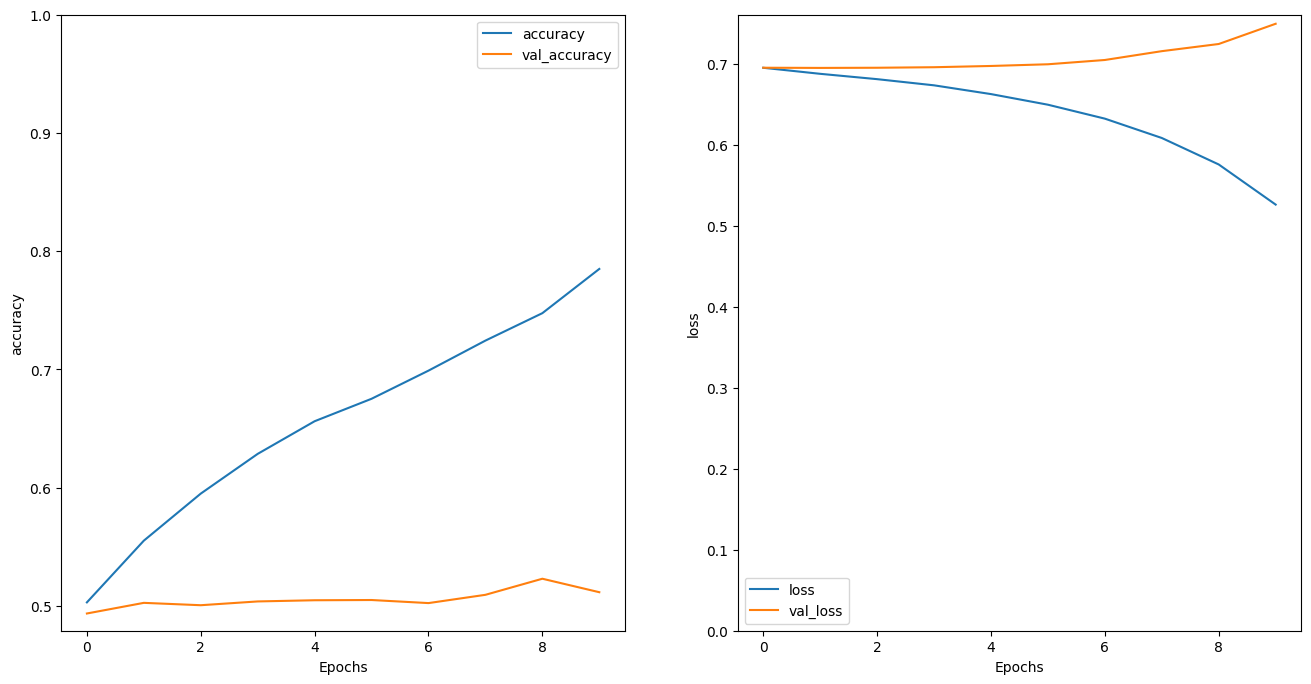

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])

history = model.fit(x=x_train, y=y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)